Шаг 1 - Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns 
plt.style.use('ggplot')

Шаг 2 - Импортируем датасет

Описание датасета: Реальные данные о продажах недвижимости в Нью-Йорке
Источник: NYC Pluto

Список переменных:
borough_x - Код района, связанный с записью о продаже недвижимости
    BX Bronx
    BK Brooklyn
    MN Manhattan
    QN Queens
    SI Staten Island
block - Идентификатор налогового квартала Нью–Йорка 
lot - Налоговый идентификатор участка недвижимости 
sale_price - Зафиксированная цена продажи, $
zip_code - Почтовый индекс
borough_y - Код района, связанный с участком, облагаемым налогом на недвижимость
yearbuilt - Год, в котором было построено основное здание на участке под застройку
lotarea - Общая площадь земельного участка, облагаемого налогом, в квадратных футах.
bldgarea - Общая площадь здания на участке, облагаемом налогом, в квадратных футах.
resarea - Часть площади здания, используемая для жилых целей, измеряется в квадратных футах.
comarea - Общая площадь коммерческих помещений в здании, измеряемая в квадратных футах.
unitsres - Количество жилых домов на земельном участке.
unitstotal - Общее количество объектов на налоговом участке, включая жилые и нежилые помещения.
numfloors - Количество этажей в главном здании на земельном участке.
latitude - широта 
longitude - долгота
**landuse** - Цифровой код категории землепользования, описывающий основное назначение объекта недвижимости
    01 One & Two Family Buildings
    02 Multi-Family Walk-Up Buildings
    03 Multi-Family Elevator Buildings
    04 Mixed Residential & Commercial Buildings
    05 Commercial & Office Buildings
    06 Industrial & Manufacturing
    07 Transportation & Utility
    08 Public Facilities & Institutions
    09 Open Space & Outdoor Recreation
    10 Parking Facilities
    11 Vacant Land
bldgclass - Строительный классификатор Нью-Йорка, определяющий конструктивные особенности и назначение объекта недвижимости.
| DCP Land Use Code | DCP Land Use Category               | DOF/DCP Building Classes                                                             
|-------------------|-------------------------------------|------------------------------------------------------------------------------------------|
| 01                | One & Two Family Buildings          | A*, B*, Z0                                                                              |
| 02                | Multi-Family Walk-Up Buildings      | C0, C1, C2, C3, C4, C5, C6, C8, C9, CM, R1, R2, R3, R6                                 |
| 03                | Multi-Family Elevator Buildings     | D0, D1, D2, D3, D4, D5, D8, D9, H6, H7, R4, RD                                         |
| 04                | Mixed Residential & Commercial Buildings| C7, D6, D7, K4, O8, R8, R9, RM, RR, RX, RZ, S*                                     |
| 05                | Commercial & Office Buildings       | G8, GU, GW, H1, H2, H3, H4, H5, H9, HB, HH, HR, HS, J*, K1, K2, K3, K5, K6, K7, K8, K9, O1, O2, O3, O4, O5, O6, O7, O9, P1, R5, R7, RB, RC, RH, RI, RK, RS |
| 06                | Industrial & Manufacturing Buildings| E*, F*, L*, RW                                                                          |
| 07                | Transportation & Utility            | G2, G3, G4, G5, G9, T*, U*, Y6, Y7, Y8, Y9                                             |
| 08                | Public Facilities & Institutions    | H8, I*, M*, N*, P2, P3, P5, P7, P8, P9, RA, W*, Y1, Y2, Y3, Y4, Z1, Z3, Z4, Z5         |
| 09                | Open Space & Outdoor Recreation     | P4, P6, Q*, Z8                                                                          |
| 10                | Parking Facilities                  | G0, G1, G6, G7, RG, RP, Z2                                                             |
| 11                | Vacant Land                         | V*                                                                                      |

building_age - Разница между годом продажи и годом постройки здания

In [4]:
df = pd.read_csv('nyc_housing_base.csv')

Шаг 3 - Познакомимся с данными и очистим их

In [41]:
df.describe()

,borough_x,block,lot,sale_price,zip_code,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,building_age
count,34439.000000,34439.000000,34439.000000,3.443900e+04,34423.000000,34439.000000,3.443900e+04,3.443900e+04,3.425100e+04,3.425100e+04,34439.000000,34439.000000,34396.000000,34433.000000,34433.000000,34436.000000,34439.000000
mean,3.073608,4562.694532,60.057174,1.171832e+06,10866.464370,1941.007579,5.244022e+04,6.271570e+04,5.593040e+04,6.846554e+03,51.716775,52.309765,4.227674,40.707342,-73.919829,1.943112,83.992421
std,1.287072,3611.017542,136.516558,1.241375e+06,557.770632,28.985203,5.032042e+05,2.712663e+05,2.116029e+05,6.971171e+04,173.385339,174.964326,5.230538,0.082194,0.108336,1.345451,28.985203
min,1.000000,1.000000,1.000000,1.186300e+04,10001.000000,1800.000000,1.610000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,40.500291,-74.253599,1.000000,0.000000
25%,2.000000,1432.000000,14.000000,5.125000e+05,10308.000000,1920.000000,2.090000e+03,1.614500e+03,1.356000e+03,0.000000e+00,1.000000,1.000000,2.000000,40.640011,-73.978330,1.000000,65.000000
50%,3.000000,3854.000000,33.000000,8.250000e+05,11210.000000,1935.000000,3.090000e+03,2.494000e+03,2.120000e+03,0.000000e+00,2.000000,2.000000,2.000000,40.705836,-73.915430,1.000000,90.000000
75%,4.000000,6678.000000,59.000000,1.300000e+06,11364.000000,1960.000000,7.502000e+03,1.450000e+04,9.816000e+03,0.000000e+00,13.000000,15.000000,4.000000,40.759718,-73.846150,3.000000,105.000000
max,5.000000,16350.000000,3635.000000,9.995000e+06,11697.000000,2025.000000,2.225160e+07,3.750565e+06,2.690565e+06,1.100000e+06,1887.000000,1906.000000,54.000000,40.912745,-73.700488,11.000000,225.000000


In [79]:
df[df['numfloors'] == 1].head(10)

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
21,1,389,50,685000,10009.0,SI,1950.0,3498.0,928.0,928.0,0.0,1.0,1.0,1.0,40.623958,-74.132926,1.0,A2,75.0
24,1,390,55,565000,10009.0,BK,1931.0,2000.0,1900.0,0.0,1900.0,0.0,1.0,1.0,40.685940,-73.991974,5.0,K1,94.0
25,1,390,55,535000,10009.0,BK,1931.0,2000.0,1900.0,0.0,1900.0,0.0,1.0,1.0,40.685940,-73.991974,5.0,K1,94.0
31,1,394,52,437500,10009.0,SI,1975.0,3680.0,1932.0,1104.0,0.0,1.0,1.0,1.0,40.622806,-74.138789,1.0,A1,50.0
60,1,743,18,3095533,10011.0,SI,1960.0,4000.0,1904.0,1088.0,0.0,1.0,1.0,1.0,40.609179,-74.138480,1.0,A2,65.0
63,1,744,70,5000000,10011.0,QN,1945.0,2000.0,1681.0,922.0,0.0,2.0,2.0,1.0,40.763183,-73.905984,1.0,B1,80.0
64,1,745,44,4998287,10011.0,QN,1953.0,2250.0,2250.0,0.0,2250.0,0.0,1.0,1.0,40.764153,-73.904156,7.0,G2,72.0
114,1,745,1,350000,10011.0,QN,1940.0,4500.0,2375.0,0.0,2375.0,0.0,1.0,1.0,40.762083,-73.905881,10.0,G1,85.0
118,1,745,17,625000,10011.0,QN,1955.0,2100.0,798.0,798.0,0.0,1.0,1.0,1.0,40.762862,-73.905570,1.0,A2,70.0
119,1,745,17,400000,10011.0,QN,1955.0,2100.0,798.0,798.0,0.0,1.0,1.0,1.0,40.762862,-73.905570,1.0,A2,70.0


In [42]:
df.describe(include="O")

,borough_y,bldgclass
count,34439,34439
unique,5,113
top,QN,D4
freq,13168,6641


In [40]:
# Видим, что в некоторых колонках есть null значения   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34439 entries, 0 to 34438
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   borough_x     34439 non-null  int64  
 1   block         34439 non-null  int64  
 2   lot           34439 non-null  int64  
 3   sale_price    34439 non-null  int64  
 4   zip_code      34423 non-null  float64
 5   borough_y     34439 non-null  object 
 6   yearbuilt     34439 non-null  float64
 7   lotarea       34439 non-null  float64
 8   bldgarea      34439 non-null  float64
 9   resarea       34251 non-null  float64
 10  comarea       34251 non-null  float64
 11  unitsres      34439 non-null  float64
 12  unitstotal    34439 non-null  float64
 13  numfloors     34396 non-null  float64
 14  latitude      34433 non-null  float64
 15  longitude     34433 non-null  float64
 16  landuse       34436 non-null  float64
 17  bldgclass     34439 non-null  object 
 18  building_age  34439 non-nu

In [58]:
#Нашли 1003 дубликаты, удалим их из датасета
df.duplicated().sum()
df = df.drop_duplicates()

In [59]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#Проверим в каких стобцах есть Null значения 
df.isnull().sum()

borough_x         0
block             0
lot               0
sale_price        0
zip_code         16
borough_y         0
yearbuilt         0
lotarea           0
bldgarea          0
resarea         188
comarea         188
unitsres          0
unitstotal        0
numfloors        43
latitude          6
longitude         6
landuse           3
bldgclass         0
building_age      0
dtype: int64

In [76]:
df[df['numfloors'].isnull()].groupby('landuse')['landuse'].count()

landuse
1.0     22
2.0      4
4.0      1
10.0    14
11.0     1
Name: landuse, dtype: int64

In [ ]:
# Наибольшее количество Missing values у нас в переменных resarea и comerea (площадь для жилья и площадь для коммерческой деятельности). 
# Проверим пропущены ли они в одних и тех же строках
both_missing = df[df['resarea'].isnull() & df['comarea'].isnull()].shape[0]
only_res_missing = df[df['resarea'].isnull() & df['comarea'].notnull()].shape[0]
only_com_missing = df[df['resarea'].notnull() & df['comarea'].isnull()].shape[0]

print("Оба пропущены:", both_missing)
print("Только resarea:", only_res_missing)
print("Только comarea:", only_com_missing)

Оба пропущены: 184
Только resarea: 0
Только comarea: 0


In [ ]:
# Сгруппируем Missing значения по типу землепользования.

df[df["resarea" ].isna()].groupby('landuse')['landuse'].count()

landuse
1.0     79
2.0     19
3.0     30
4.0      1
5.0      6
6.0      3
8.0      1
10.0    43
11.0     1
Name: landuse, dtype: int64

In [80]:
# Landuse 1-3 - здания только для жилого пользования, соответственно resarea = bldgarea, comarea = 0

mask_residential = (
    df['landuse'].isin([1, 2, 3]) &
    df['resarea'].isna() &
    df['comarea'].isna()
)

df.loc[mask_residential, 'resarea'] = df.loc[mask_residential, 'bldgarea']
df.loc[mask_residential, 'comarea'] = 0


# Landuse - 10 - парковки, соответственно resarea = bldgarea, comarea = bldgarea, resarea = 0
mask_parking = (
    (df['landuse'] == 10) &
    df['resarea'].isna() &
    df['comarea'].isna()
)

df.loc[mask_parking, 'resarea'] = 0
df.loc[mask_parking, 'comarea'] = df.loc[mask_parking, 'bldgarea']

In [ ]:
# Оставшиеся Null значения для удобства удалим
df_clean = df.copy()
df_clean = df_clean.dropna(axis=0, how='any')
# Удалилось 78 строк
df.shape[0]-df_clean.shape[0]

78

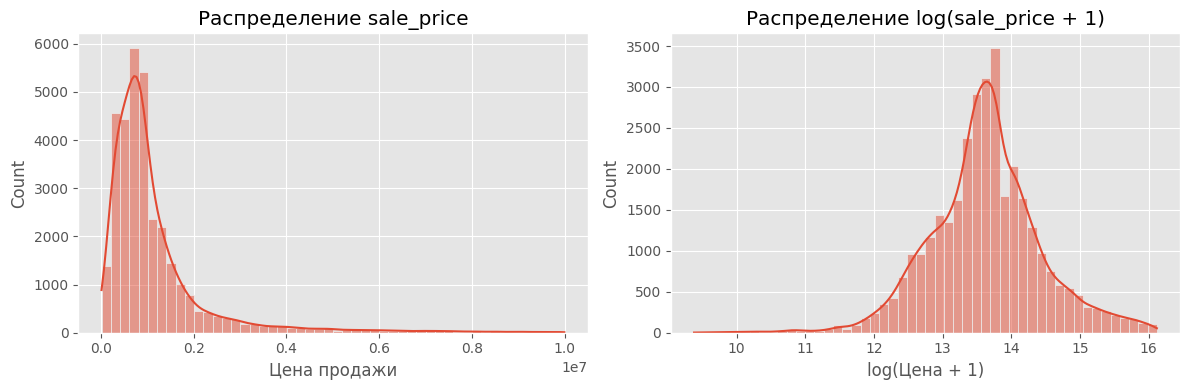

sale_price — основные метрики:
count    3.335800e+04
mean     1.163055e+06
std      1.222256e+06
min      1.186300e+04
25%      5.233748e+05
50%      8.250000e+05
75%      1.290000e+06
max      9.995000e+06
Name: sale_price, dtype: float64

Медиана: 825000.0


In [86]:
plt.figure(figsize=(12, 4))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df_clean['sale_price'], kde=True, bins=50)
plt.title('Распределение sale_price')
plt.xlabel('Цена продажи')

# Q-Q plot или лог-шкала
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df_clean['sale_price']), kde=True, bins=50)
plt.title('Распределение log(sale_price + 1)')
plt.xlabel('log(Цена + 1)')

plt.tight_layout()
plt.show()

# Статистика
print("sale_price — основные метрики:")
print(df_clean['sale_price'].describe())
print(f"\nМедиана: {df_clean['sale_price'].median()}")

In [87]:
# Пример: проверка yearbuilt
print("Год постройки — диапазон:")
print(df_clean['yearbuilt'].describe())

# Аномалии: здания из будущего или до 1800 года?
anomalies_year = df_clean[(df_clean['yearbuilt'] > 2026) | (df_clean['yearbuilt'] < 1800)]
print(f"Аномальных значений yearbuilt: {len(anomalies_year)}")

# Площади: должны быть >= 0
for col in ['lotarea', 'bldgarea', 'resarea', 'comarea']:
    neg = (df_clean[col] < 0).sum()
    zero = (df_clean[col] == 0).sum()
    print(f"{col}: отрицательных = {neg}, нулевых = {zero}")

Год постройки — диапазон:
count    33358.000000
mean      1940.874183
std         29.018402
min       1800.000000
25%       1920.000000
50%       1935.000000
75%       1960.000000
max       2025.000000
Name: yearbuilt, dtype: float64
Аномальных значений yearbuilt: 0
lotarea: отрицательных = 0, нулевых = 0
bldgarea: отрицательных = 0, нулевых = 29
resarea: отрицательных = 0, нулевых = 1463
comarea: отрицательных = 0, нулевых = 27289


In [33]:
categorical_cols = ['borough_y', 'bldgclass', 'landuse']

for col in categorical_cols:
    print(f"\nУникальные значения в {col}:")
    print(df_clean[col].value_counts().head(10))  # первые 10
    print(f"Всего категорий: {df_clean[col].nunique()}")


Уникальные значения в borough_y:
borough_y
QN    13088
BK     9839
MN     3997
SI     3919
BX     3360
Name: count, dtype: int64
Всего категорий: 5

Уникальные значения в bldgclass:
bldgclass
D4    6610
A1    4138
A5    3374
B1    2629
B2    2561
C0    2514
B3    2008
A2    1529
C6    1387
B9     928
Name: count, dtype: int64
Всего категорий: 109

Уникальные значения в landuse:
landuse
1.0     18561
3.0      6979
2.0      5529
4.0      1715
5.0       689
6.0       305
8.0       214
7.0       139
10.0       67
9.0         3
Name: count, dtype: int64
Всего категорий: 11


Корреляция признаков с sale_price:
sale_price      1.000000
borough_x      -0.193359
block          -0.191986
building_age    0.137630
yearbuilt      -0.137630
unitsres       -0.117235
unitstotal     -0.115833
landuse         0.114550
longitude      -0.107666
resarea        -0.090680
zip_code       -0.084760
bldgarea       -0.078054
lotarea        -0.045826
comarea        -0.030443
numfloors      -0.022686
latitude        0.016874
lot            -0.013074
Name: sale_price, dtype: float64


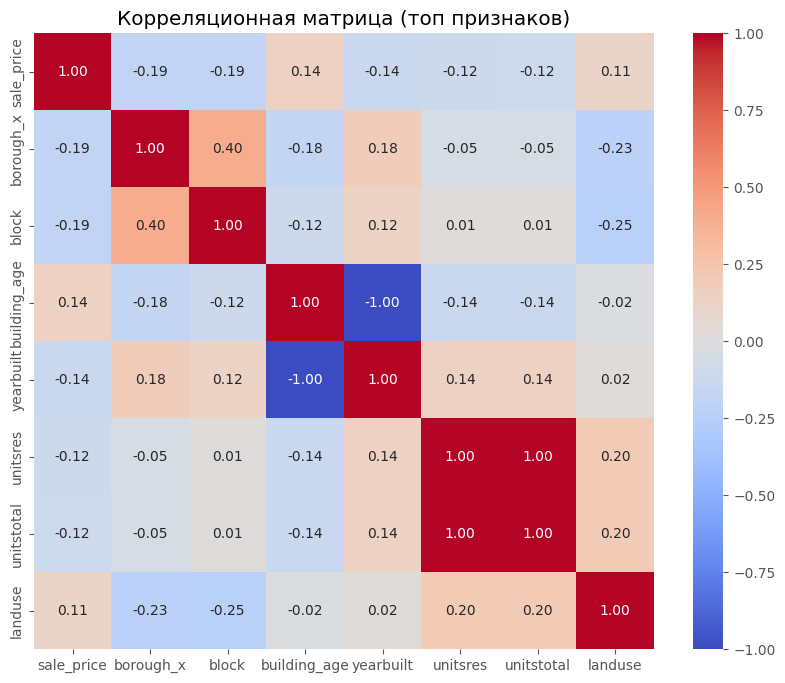

In [34]:
numeric_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
corr_with_price = df_clean[numeric_cols].corr()['sale_price'].sort_values(key=abs, ascending=False)

print("Корреляция признаков с sale_price:")
print(corr_with_price)

# Тепловая карта (только для самых важных признаков)
top_features = corr_with_price.index[:8]  # топ-8 признаков по корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица (топ признаков)')
plt.show()

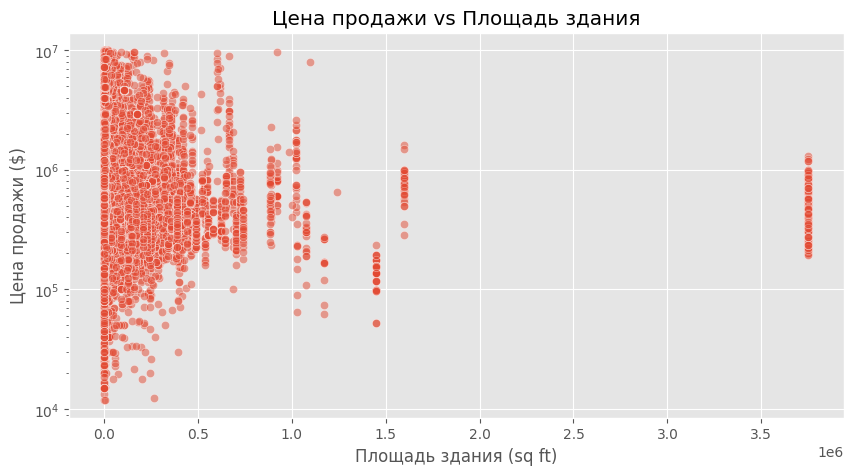

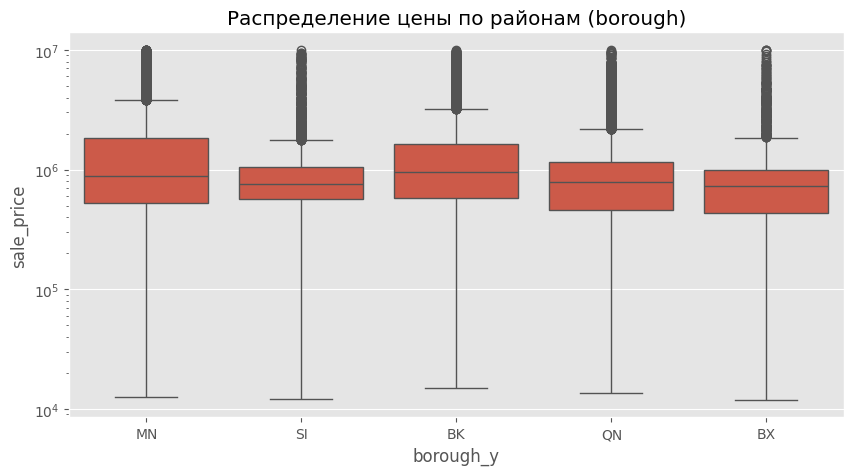

In [35]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_clean, x='bldgarea', y='sale_price', alpha=0.5)
plt.title('Цена продажи vs Площадь здания')
plt.xlabel('Площадь здания (sq ft)')
plt.ylabel('Цена продажи ($)')
plt.yscale('log')  # лог-шкала для цены
plt.show()

# Цена по районам (borough)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='borough_y', y='sale_price')
plt.yscale('log')
plt.title('Распределение цены по районам (borough)')
plt.show()